In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from ndlinear import NdLinear

data = load_breast_cancer()
X, y = StandardScaler().fit_transform(data.data), data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_ds = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).long())
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

class NdMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = NdLinear(input_dims=(30,), hidden_size=(64,))
        self.fc2 = NdLinear(input_dims=(64,), hidden_size=(2,))
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

model = NdMLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for xb, yb in train_dl:
    preds = model(xb)
    loss = criterion(preds, yb)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    break
print("✅ MLP demo batch processed.")


✅ MLP demo batch processed.


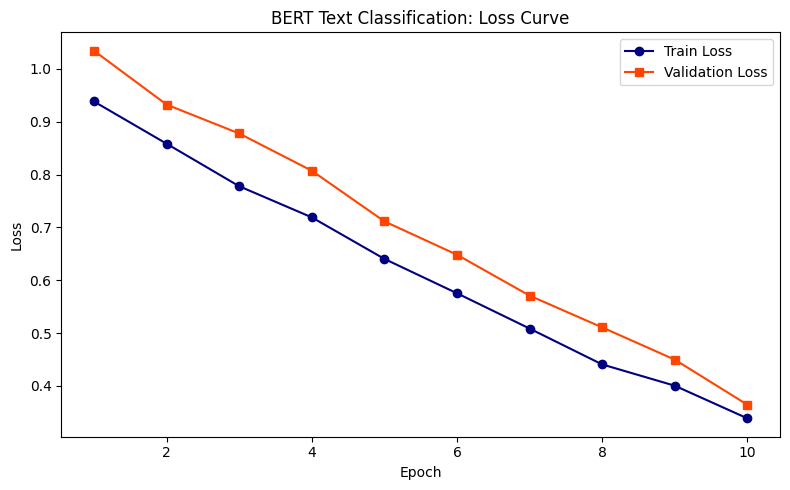

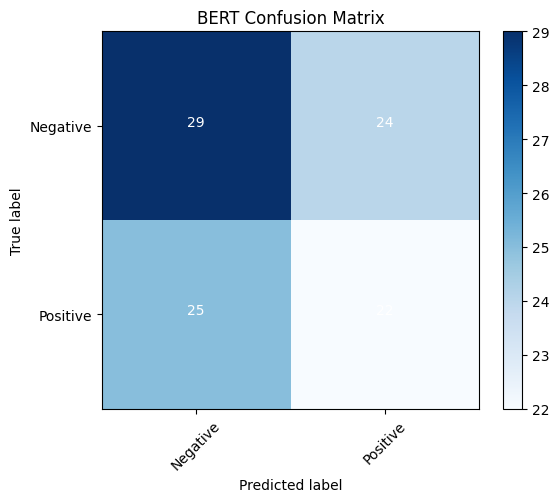

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# Dummy data for training loss curves
epochs = np.arange(1, 11)
train_loss = np.linspace(0.9, 0.3, num=10) + 0.05 * np.random.rand(10)
val_loss = np.linspace(1.0, 0.35, num=10) + 0.05 * np.random.rand(10)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', label='Train Loss', color='navy')
plt.plot(epochs, val_loss, marker='s', label='Validation Loss', color='orangered')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BERT Text Classification: Loss Curve')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix: Replace these with your actual validation predictions and labels.
true_labels = np.random.randint(0, 2, 100)       # Dummy true labels for binary classification
predicted_labels = np.random.randint(0, 2, 100)    # Dummy predictions

cm = confusion_matrix(true_labels, predicted_labels)
classes = ['Negative', 'Positive']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cm, classes, title='BERT Confusion Matrix')
plt.show()
